In [4]:
from CrossValidation import *
%matplotlib inline

In [5]:
IMDB_ratings = pd.read_csv('datafiles/05_15_movie_books_IMDB_ratings.csv', index_col=0)

In [6]:
GR_ratings = pd.read_csv('datafiles/05_15_movie_books_GR_ratings.csv', index_col=0)

In [8]:
dummies = pd.get_dummies(IMDB_ratings.MPAArating)
IMDB_ratings = pd.concat([IMDB_ratings, dummies], axis=1)
IMDB_ratings = IMDB_ratings.rename(columns = {'PG-13':'PG13'})

In [9]:
all_df = IMDB_ratings.merge(GR_ratings, on='Title')

In [10]:
all_df.head()

,Title,Budget,Gross,MPAArating,Runtime,IMDBRating,IMDBRatingCount,IMDBMCRating,IMDBMCRatingCount,APPROVED,...,NOT RATED,PASSED,PG,PG13,R,TV-14,UNRATED,X,GRRating,GRRatingCount
0,The Wolf of Wall Street,100000000,116866727,R,180,8.2,705753,NaN,NaN,0,...,0,0,0,0,1,0,0,0,3.64,18175
1,Into the Wild,15000000,18352454,R,148,8.2,401238,NaN,NaN,0,...,0,0,0,0,1,0,0,0,3.92,539534
2,Gone Girl,61000000,167735396,R,149,8.1,517073,NaN,NaN,0,...,0,0,0,0,1,0,0,0,3.99,1240870
3,Going Clear: Scientology and the Prison of Belief,NaN,NaN,NOT RATED,119,8.1,19936,NaN,NaN,0,...,1,0,0,0,0,0,0,0,3.99,24468
4,The Pact,NaN,NaN,NaN,84,8.1,31,NaN,NaN,0,...,0,0,0,0,0,0,0,0,3.99,211335


In [11]:
all_df['logGRRating'] = np.log(all_df.GRRating)
all_df['squareIMDBRatingCount'] = np.square(all_df.IMDBRatingCount)

In [12]:
all_df.head()

,Title,Budget,Gross,MPAArating,Runtime,IMDBRating,IMDBRatingCount,IMDBMCRating,IMDBMCRatingCount,APPROVED,...,PG,PG13,R,TV-14,UNRATED,X,GRRating,GRRatingCount,logGRRating,squareIMDBRatingCount
0,The Wolf of Wall Street,100000000,116866727,R,180,8.2,705753,NaN,NaN,0,...,0,0,1,0,0,0,3.64,18175,1.291984,4.980873e+11
1,Into the Wild,15000000,18352454,R,148,8.2,401238,NaN,NaN,0,...,0,0,1,0,0,0,3.92,539534,1.366092,1.609919e+11
2,Gone Girl,61000000,167735396,R,149,8.1,517073,NaN,NaN,0,...,0,0,1,0,0,0,3.99,1240870,1.383791,2.673645e+11
3,Going Clear: Scientology and the Prison of Belief,NaN,NaN,NOT RATED,119,8.1,19936,NaN,NaN,0,...,0,0,0,0,0,0,3.99,24468,1.383791,3.974441e+08
4,The Pact,NaN,NaN,NaN,84,8.1,31,NaN,NaN,0,...,0,0,0,0,0,0,3.99,211335,1.383791,9.610000e+02


0.0024000000000000002 0.0198493579097 [  5.22340137e-13  -0.00000000e+00   5.03796340e-07  -1.71161977e-09
  -0.00000000e+00   1.65871404e-03] 7.3807595132 -0.0307331157793
0.043300000000000005 0.0179656512074 [  5.88534081e-13  -2.61109449e-02   6.44342856e-07  -2.81761993e-09
  -1.85060092e-10   2.91650715e-03] 7.25072487754 0.236386237047
[  4.16999974e-13  -3.05592930e-02   7.84700925e-07  -3.05718367e-09
  -2.32631202e-10   3.13227817e-03] 7.21930173117 0.221705299193


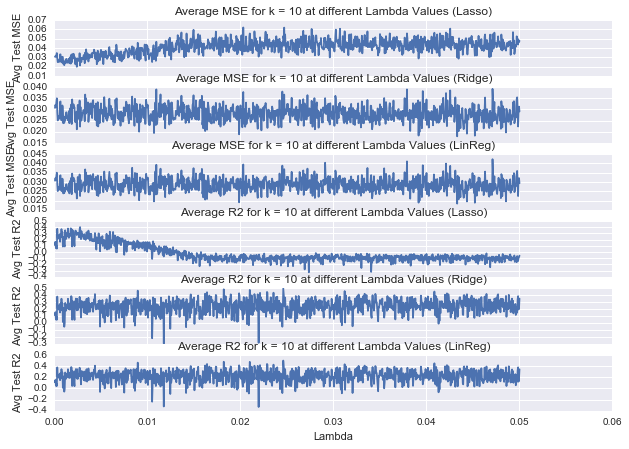

In [13]:
plotMSEandR2vLambda(all_df, 'IMDBRating', ['squareIMDBRatingCount', 'R', 'IMDBRatingCount', 'Budget', 'Gross', 'Runtime'])